In [2]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [3]:
import warnings as wn

In [4]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [5]:
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [6]:
k11avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ensAvg_1x1_1950_2100.nc'
ds_k11avg = xr.open_dataset(k11avgpath)

z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [11]:
def graph(ds, date, plot, title, coords):
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    
    if type(date) == str:
        Z = ds['MI'].sel(time=date).squeeze()
    if type(date) == int:
        Z = ds['MI'].sel(year=date).squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)

    if coords != None:
        plot.set_extent(coords)

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')

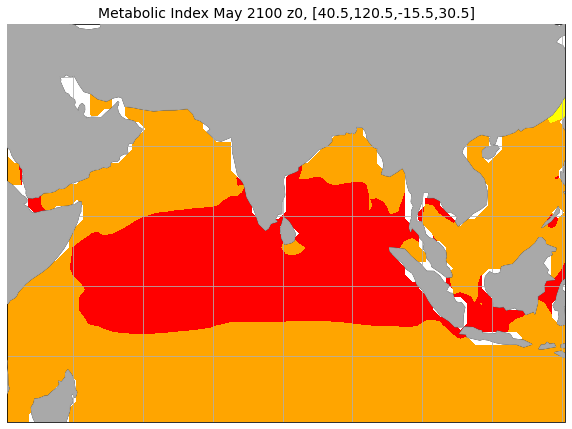

In [12]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [40.5,120.5,-15.5,30.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0, [40.5,120.5,-15.5,30.5]', coords)

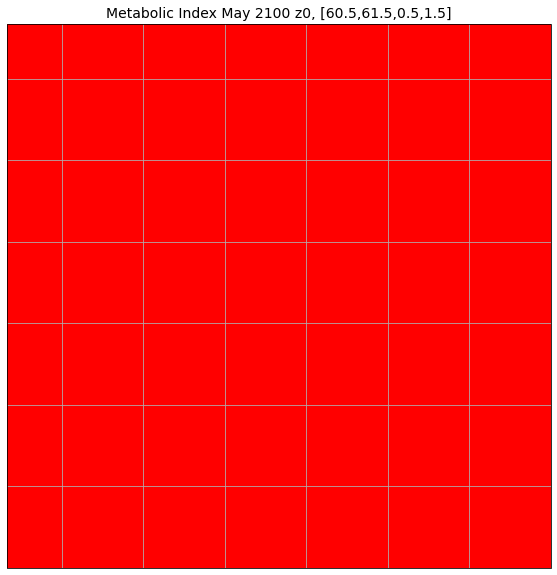

In [23]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [60.5,61.5,1.5,2.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0, [60.5,61.5,0.5,1.5]', coords)

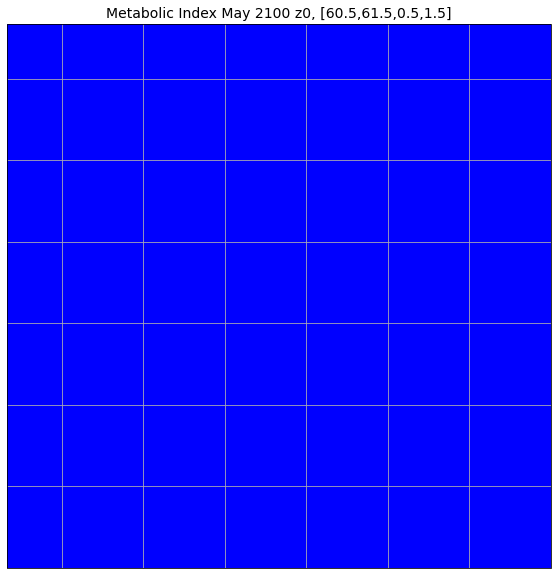

In [28]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [178.5,179.5,88.5,89.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0, [178.5,179.5,88.5,89.5]', coords)

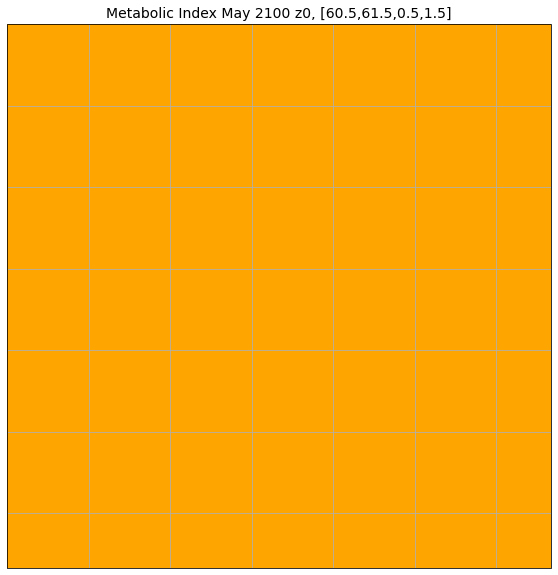

In [27]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [-179.5,-178.5,0.5,1.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0, [-179.5,-178.5,0.5,1.5]', coords)

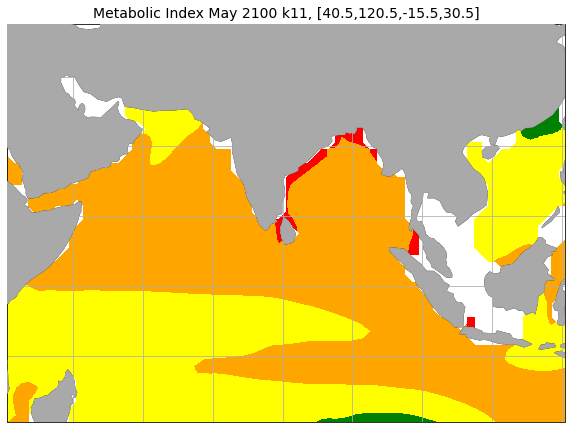

In [11]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [40.5,120.5,-15.5,30.5]
graph(ds_k11avg, '2100-05-16', ax, 'Metabolic Index May 2100 k11, [40.5,120.5,-15.5,30.5]', coords)

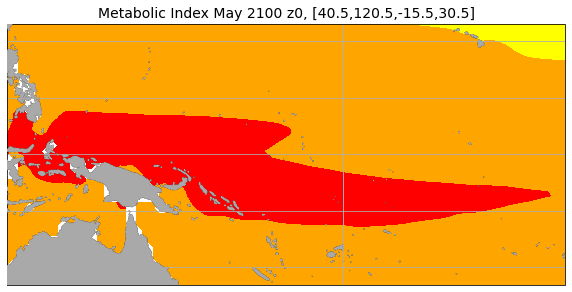

In [8]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [120.5,-140.5,-15.5,15.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0, [40.5,120.5,-15.5,30.5]', coords)

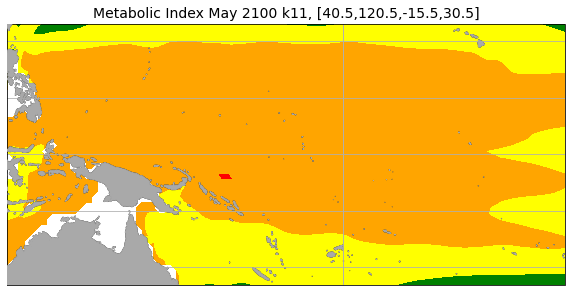

In [12]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
coords = [120.5,-140.5,-15.5,15.5]
graph(ds_k11avg, '2100-05-16', ax, 'Metabolic Index May 2100 k11, [40.5,120.5,-15.5,30.5]', coords)

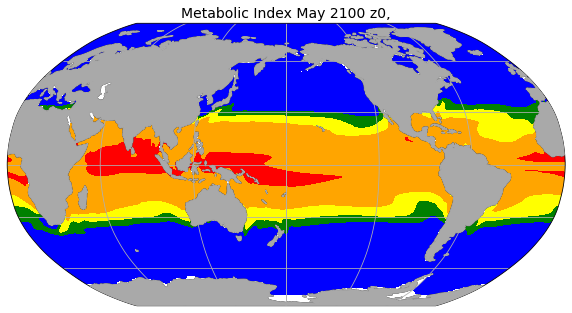

In [13]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
coords = [-179.5,179.5,-89.5,89.5]
graph(ds_z0avg, '2100-05-16', ax, 'Metabolic Index May 2100 z0,', None)

In [10]:
def map_mi(data, start, end, plot, title, coords):
    ds = data.sel(time=slice(start,end))
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()

    # Specify the longitude and latitude, and the variable that you wish to plot
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    Z = ds['MI'].squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
    # To overcome an issue with the discontinous nature of data in the x-dimension, use the add_cyclic_point function
    Z, X = add_cyclic_point(Z,coord=X)

    # Create a contour plot of SST
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)
    
    # Zoom in on a region
    plot.set_extent(coords)

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()

    # Give your plot a title
    plot.set_title(title,fontsize=14,loc='center')

In [11]:
def months_of_year(data,year,coords):
    fig, axs = plt.subplots(figsize=(20,20),nrows=4,ncols=3, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
    fig.suptitle('Ensemble Average RCP8.5 Global Metabolic Index '+year+', z0',fontsize=15) # Specify a figure title
    map_mi(data,year+'-01-01',year+'-01-31', axs[0,0], '(a) January',coords)
    map_mi(data,year+'-02-01',year+'-02-28', axs[0,1], '(b) February',coords)
    map_mi(data,year+'-03-01',year+'-03-31', axs[0,2], '(c) March',coords)
    map_mi(data,year+'-04-01',year+'-04-30', axs[1,0], '(d) April',coords)
    map_mi(data,year+'-05-01',year+'-05-31', axs[1,1], '(e) May',coords)
    map_mi(data,year+'-06-01',year+'-06-30', axs[1,2], '(f) June',coords)
    map_mi(data,year+'-07-01',year+'-07-31', axs[2,0], '(g) July',coords)
    map_mi(data,year+'-08-01',year+'-08-31', axs[2,1], '(h) August',coords)
    map_mi(data,year+'-09-01',year+'-09-30', axs[2,2], '(e) September',coords)
    map_mi(data,year+'-10-01',year+'-10-30', axs[3,0], '(f) October',coords)
    map_mi(data,year+'-11-01',year+'-11-30', axs[3,1], '(g) November',coords)
    map_mi(data,year+'-12-01',year+'-12-31', axs[3,2], '(h) December',coords)

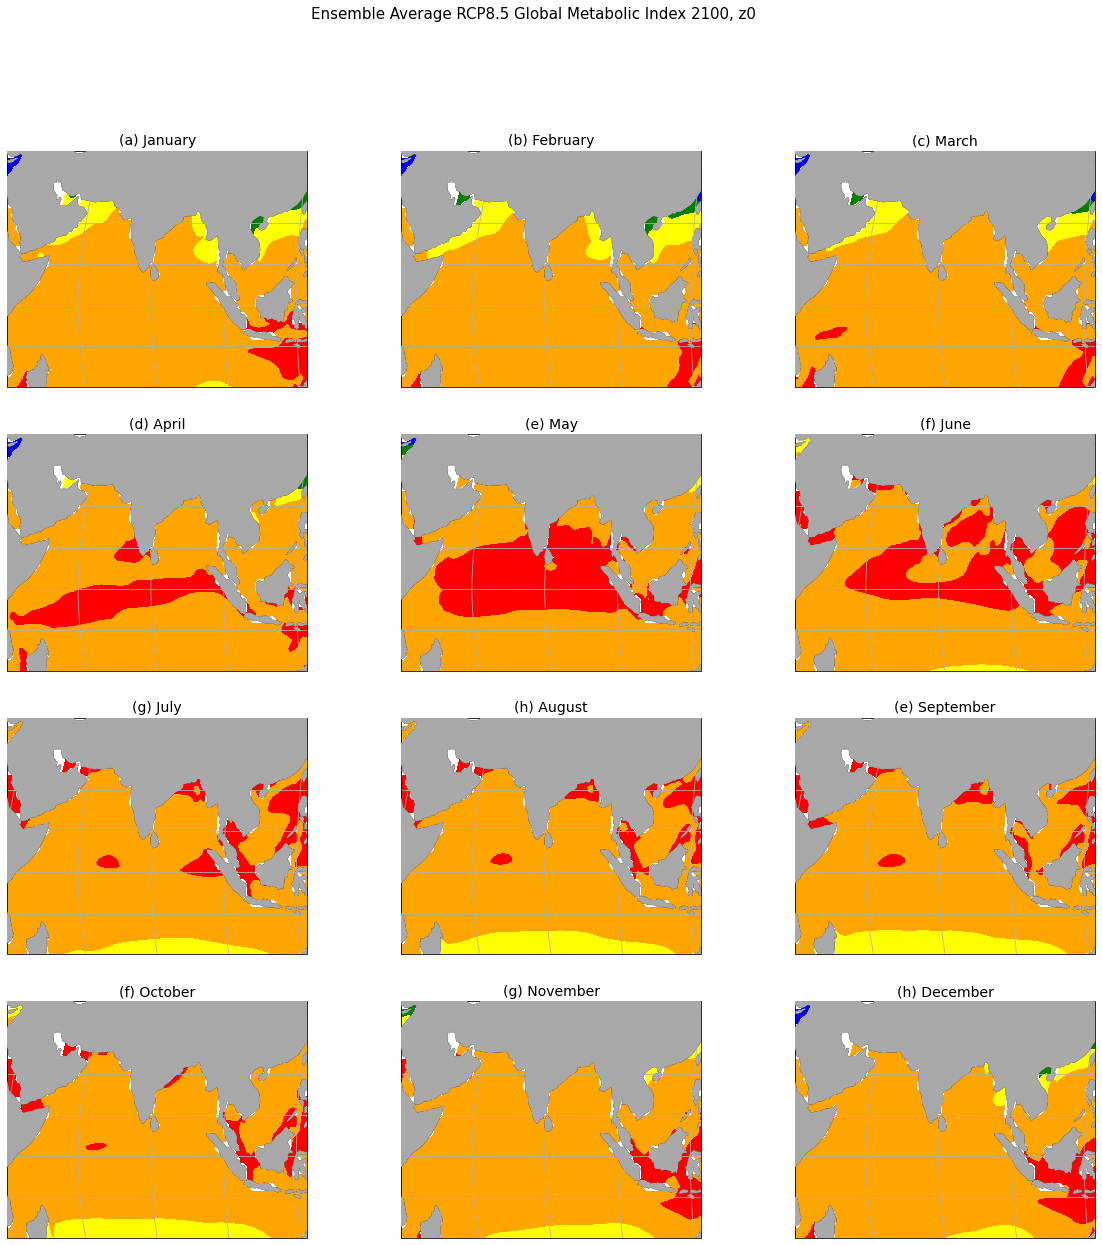

In [12]:
coords = [40.5,120.5,-15.5,30.5]
months_of_year(ds_z0avg,'2100',coords)

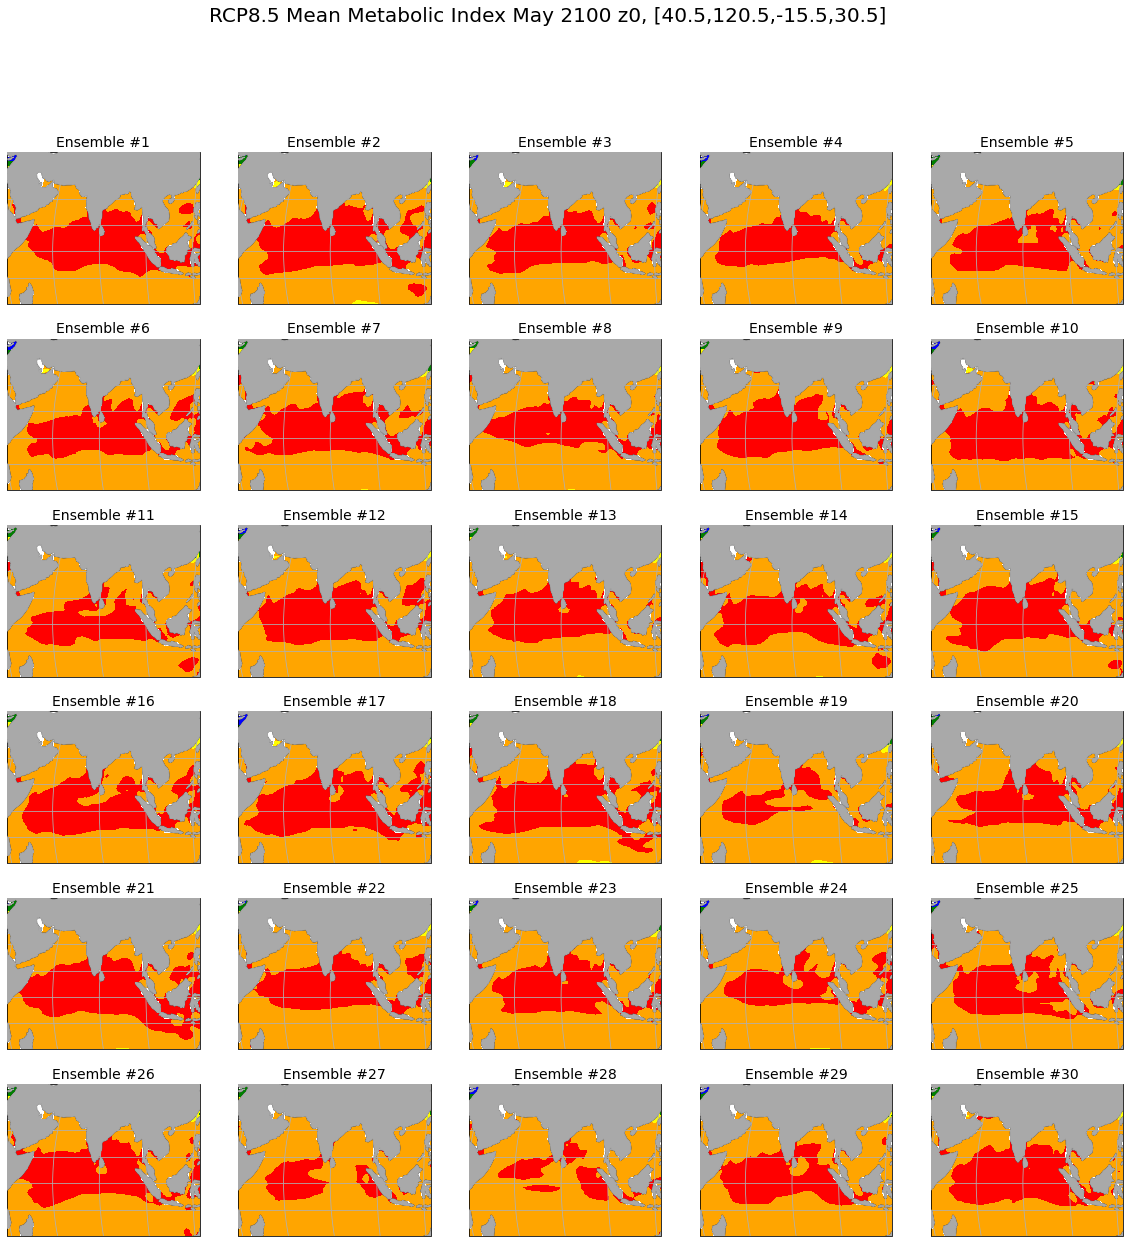

In [40]:
coords = [40.5,120.5,-15.5,30.5]
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Mean Metabolic Index May 2100 z0, [40.5,120.5,-15.5,30.5]',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph(ds_ens,'2100-05-16',axs[row,col],'Ensemble #'+str(ensNum+1),coords)
        ensNum += 1

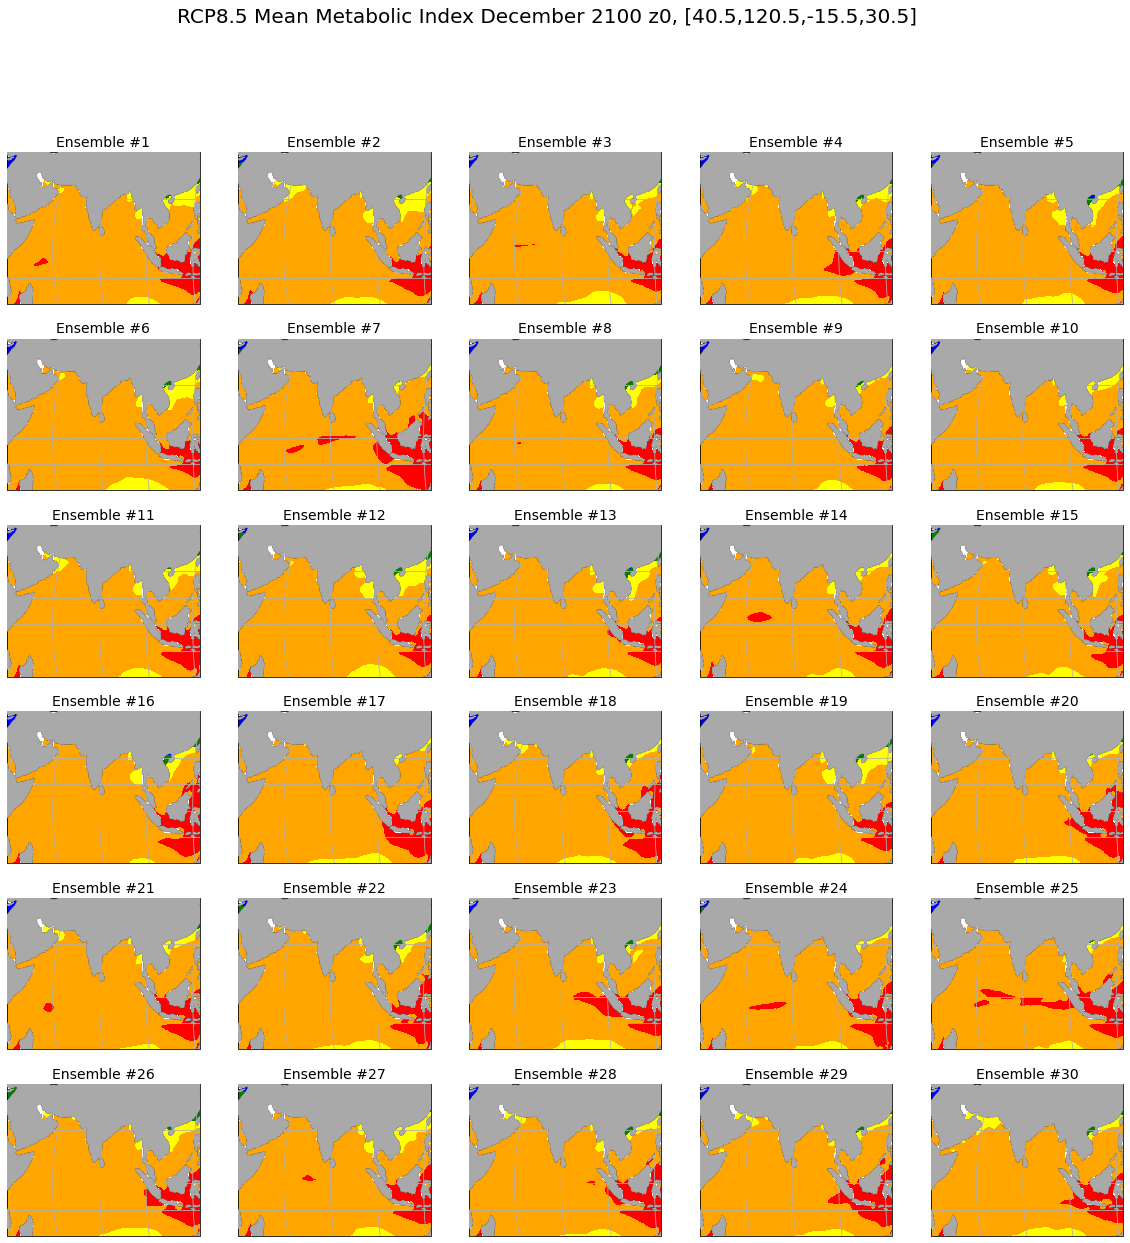

In [41]:
coords = [40.5,120.5,-15.5,30.5]
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Mean Metabolic Index December 2100 z0, [40.5,120.5,-15.5,30.5]',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph(ds_ens,'2100-12-16',axs[row,col],'Ensemble #'+str(ensNum+1),coords)
        ensNum += 1

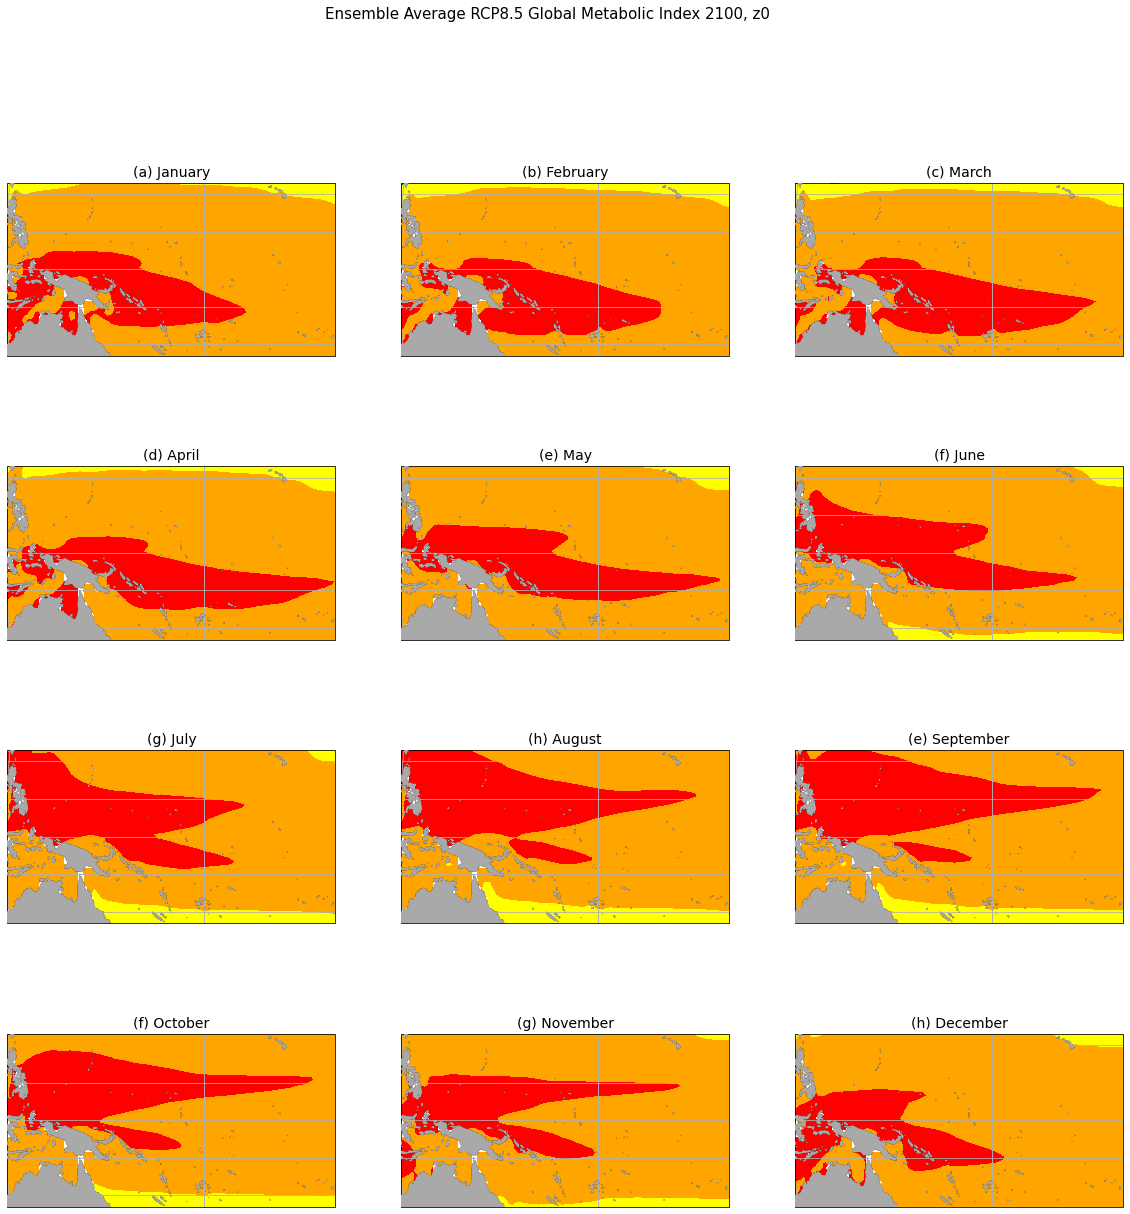

In [13]:
coords = [120.5,-140.5,-15.5,15.5]
months_of_year(ds_z0avg,'2100',coords)

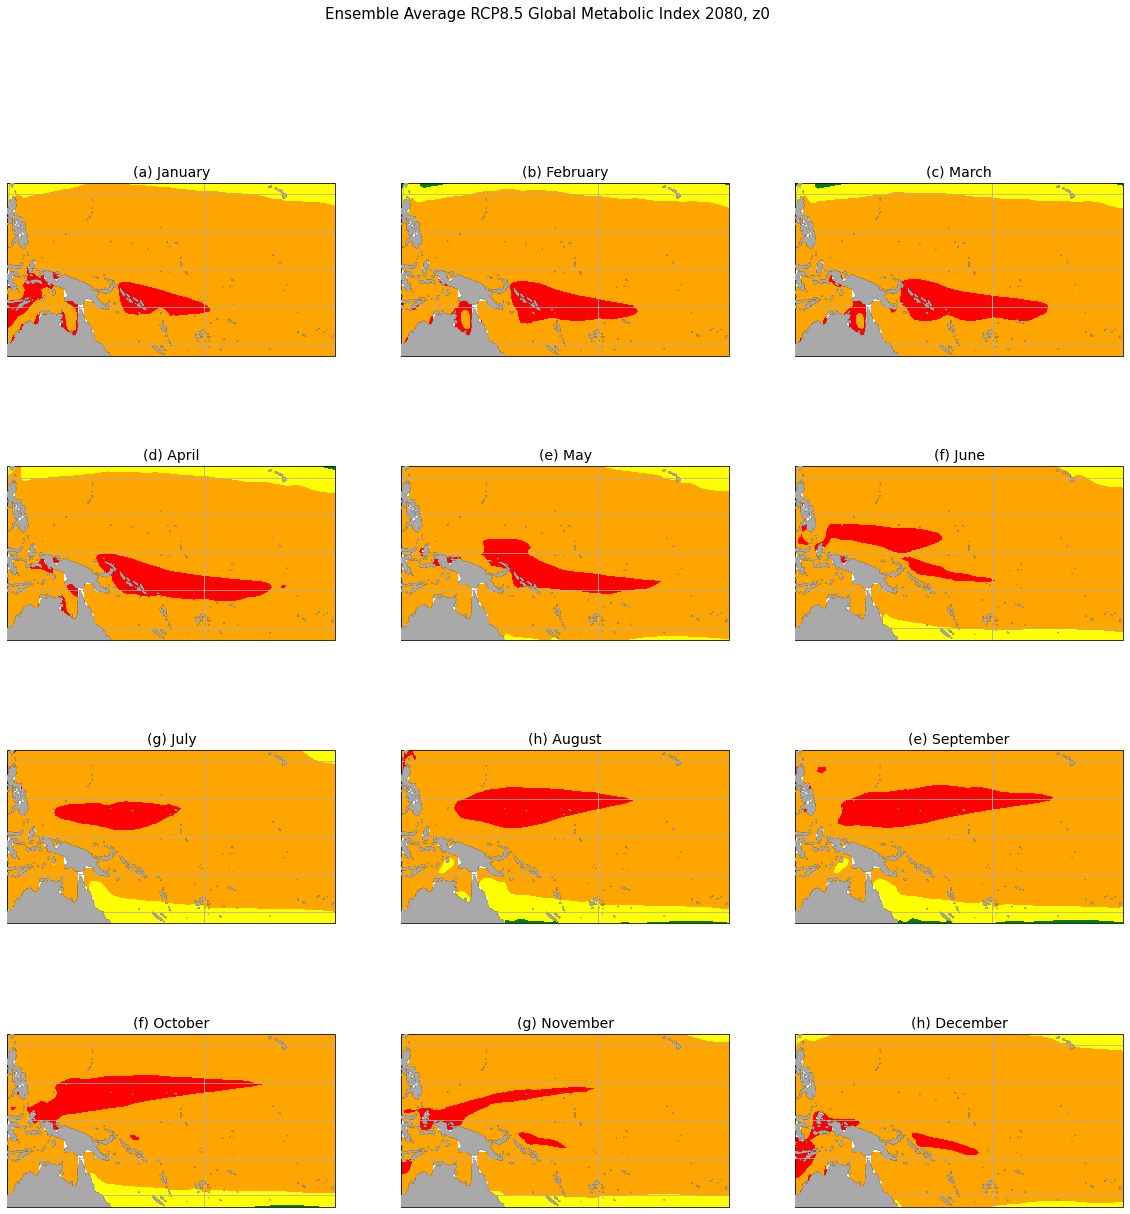

In [14]:
coords = [120.5,-140.5,-15.5,15.5]
months_of_year(ds_z0avg,'2080',coords)

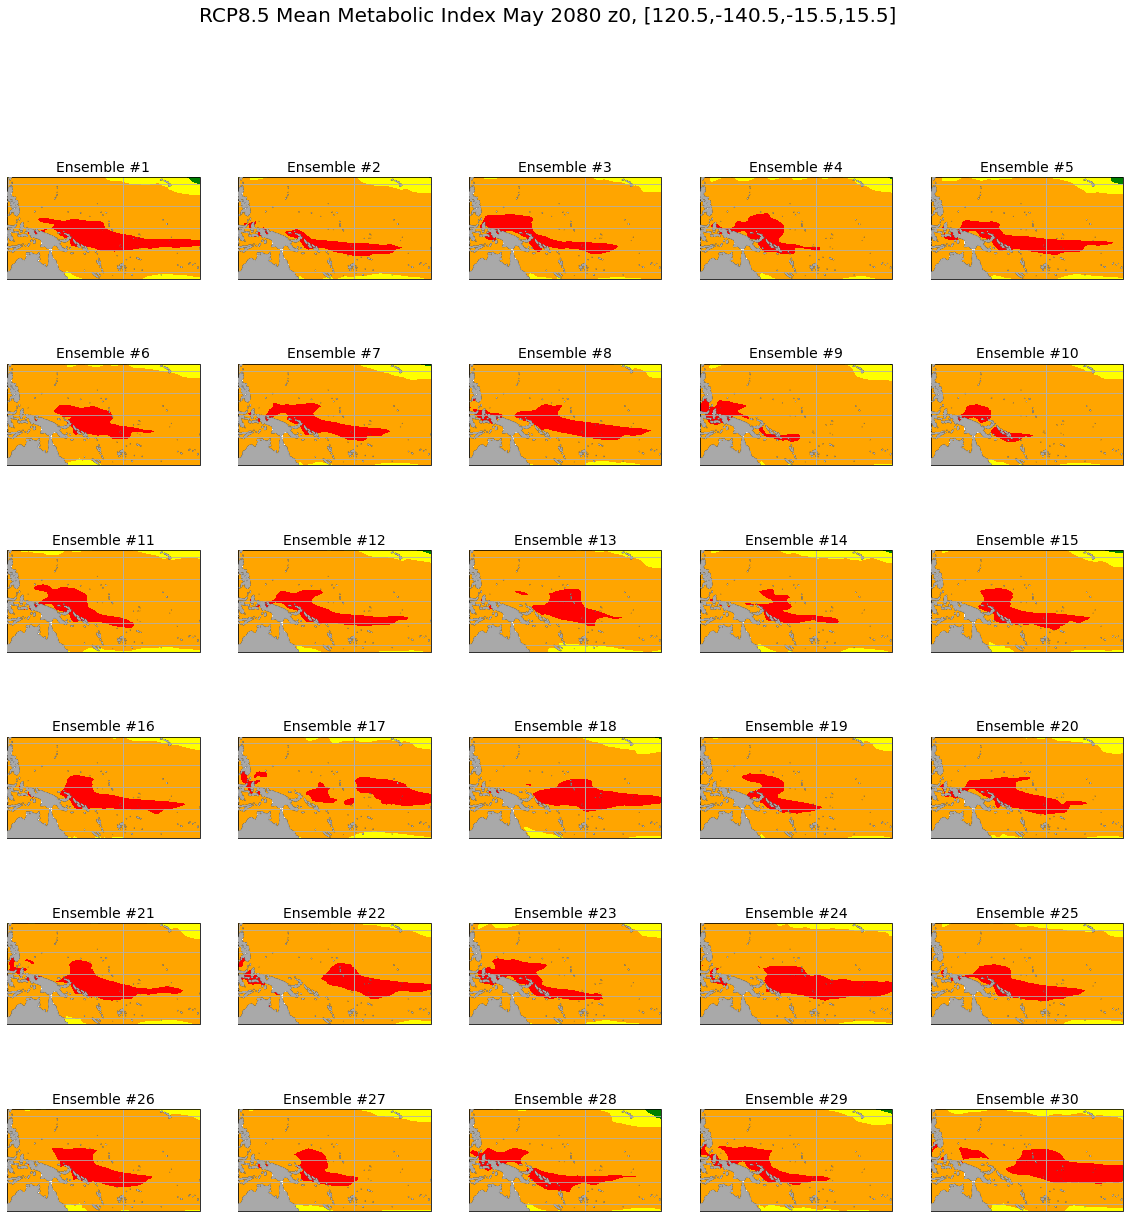

In [15]:
coords = [120.5,-140.5,-15.5,15.5]
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Mean Metabolic Index May 2080 z0, [120.5,-140.5,-15.5,15.5]',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph(ds_ens,'2080-05-16',axs[row,col],'Ensemble #'+str(ensNum+1),coords)
        ensNum += 1

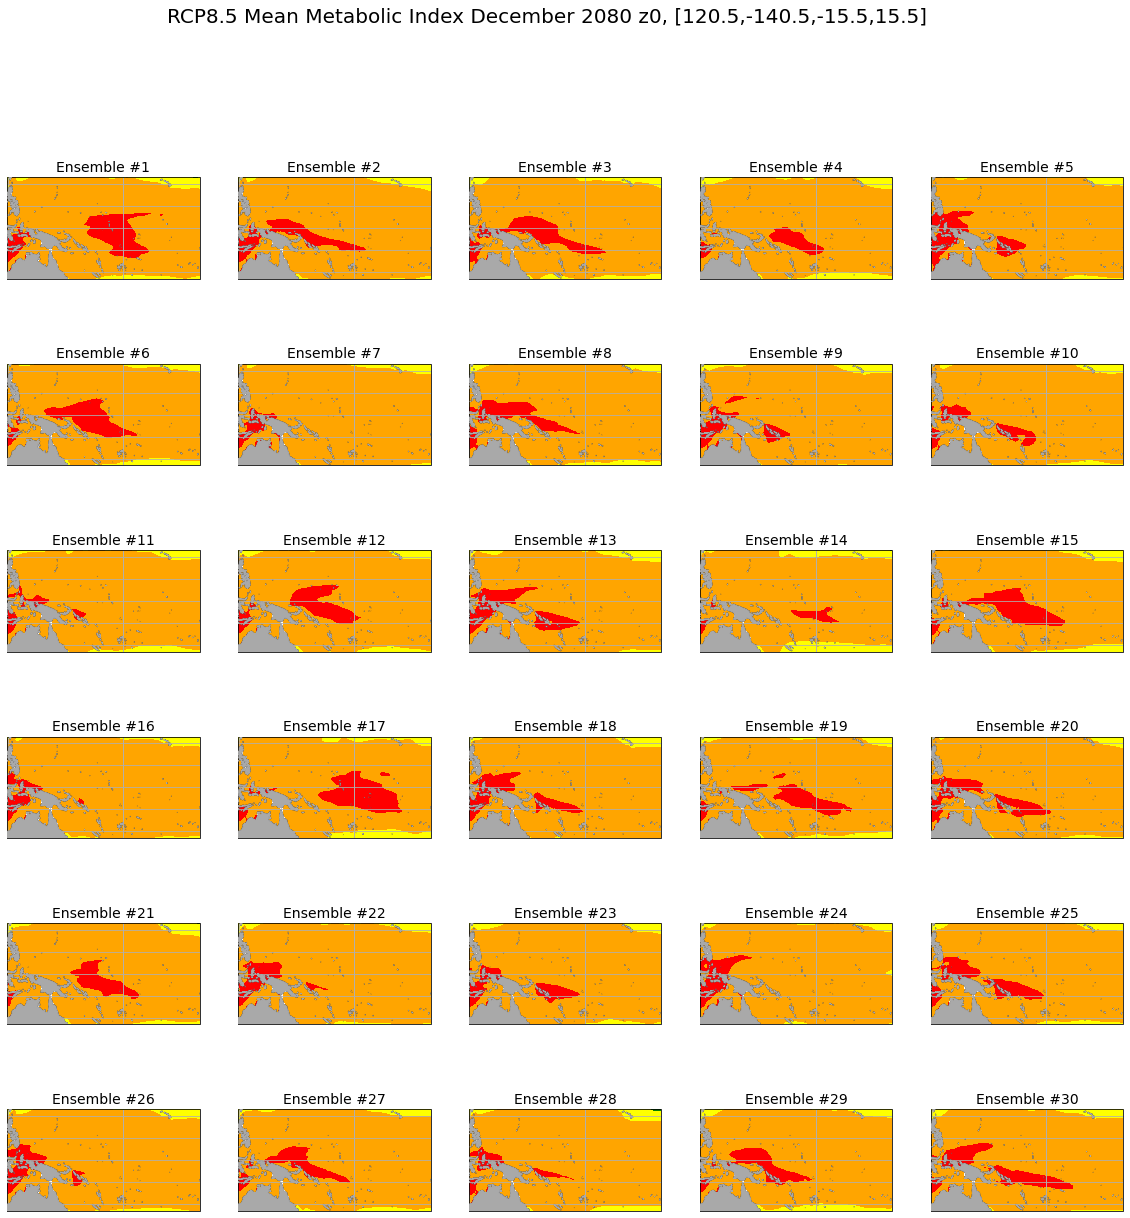

In [16]:
coords = [120.5,-140.5,-15.5,15.5]
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Mean Metabolic Index December 2080 z0, [120.5,-140.5,-15.5,15.5]',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph(ds_ens,'2080-12-16',axs[row,col],'Ensemble #'+str(ensNum+1),coords)
        ensNum += 1